In [1]:
import numpy as np
import scipy as sp
import constants as c
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from simu import Simu

In [2]:
# generate the parameter file

parameter_list = [
                #disk
                  'r_min = 0.2 #[AU]', 
                  'r_max = 7.0 #[AU]',
                  'r_N = 500',
                  'z_max = 0.6 #[AU]',
                  'z_N = 501',
    
                # gas background
                  'sigma0 = 2000. #gas surface density at 1 AU  [g/cm3]', 
                  'ps = -1.0 #surface density power law exponent',
                  'T0 = 280. #gas temperature at 1 AU [K]',
                  'q = -0.429 #temperature power law index',
                  'alpha = 1.0e-4 #turbulence parameter',
                #dust background
                  'dtg = 0.01 #dust-to-gas ratio',
                  'dbgmodel = SW #model of the background dust [birnst2012, SW]',
                  'v_f = 500. #fragmemntation velocity [cm/s]',
                  'v_b = 50. #bouncing velocity [cm/s]',
                  'rho_s = 1.5 #dust solid density [g/cm3]',
                  'a_min = 1.0e-5 #monormer radius (smallest grain size)[cm]',
                  'a_max = 100. #maximum dust particle size bin [cm]',
                  'Nf = 300 #number of dust particle bins',
                  
                #particle
                  'a0 = 1.0e-4 #initial dust particle size [cm]',
                  'z0 = 0.0 #initial altitude above the midplane [AU]',
                  'r0 = 5.0 #initial radial position [AU] ',
                  
                #simulation modes   
                  'collisions = True #collsion and growth of the particle',
                  'barrier = bouncing',
                  'feps = 0.1 #group all the collisions below this mass fraction',
                  'f_diff = 1.0e-2',
                  'f_coll = 1.0',
                  'randmotion = True #random dust motion due to turbulence',
                  'viscev = False #viscous evolution of the gas background (not yet implemented)',
                  'rad_vel = Fabian20',
                
                #simulation termination criteria
                  't_tot = 6.0e6 #[yr], maximum simulation period',
                  'r_end = 0.2 #[AU], simulation stops when particle corsses this radius'
    
                    
                 ]



with open('parameters.inp', 'w') as file_handler:
    for item in parameter_list:
        file_handler.write("{}\n".format(item))

# generate the parameter file

parameter_list = [
                #disk
                  'r_min = 0.2 #[AU]', 
                  'r_max = 7.0 #[AU]',
                  'r_N = 500',
                  'z_max = 0.6 #[AU]',
                  'z_N = 501',
    
                # gas background
                  'sigma0 = 2000. #gas surface density at 1 AU  [g/cm3]', 
                  'ps = -1.0 #surface density power law exponent',
                  'T0 = 280. #gas temperature at 1 AU [K]',
                  'q = -0.429 #temperature power law index',
                  'alpha = 1.0e-3 #turbulence parameter',
                #dust background
                  'dtg = 0.01 #dust-to-gas ratio',
                  'dbgmodel = birnst2012 #model of the background dust [birnst2012, SW]',
                  'v_f = 500. #fragmemntation velocity [cm/s]',
                  'v_b = 50. #bouncing velocity [cm/s]',
                  'rho_s = 1.5 #dust solid density [g/cm3]',
                  'a_min = 1.0e-5 #monormer radius (smallest grain size)[cm]',
                  'a_max = 100. #maximum dust particle size bin [cm]',
                  'Nf = 300 #number of dust particle bins',
                  
                #particle
                  'a0 = 1.0e-5 #initial dust particle size [cm]',
                  'z0 = 0.0 #initial altitude above the midplane [AU]',
                  'r0 = 5.0 #initial radial position [AU] ',
                  
                #simulation modes   
                  'collisions = True #collsion and growth of the particle',
                  'barrier = fragmentation',
                  'feps = 0.1 #group all the collisions below this mass fraction',
                  'f_diff = 1.0e-2',
                  'f_coll = 1.0',
                  'randmotion = True #random dust motion due to turbulence',
                  'viscev = False #viscous evolution of the gas background (not yet implemented)',
                  'rad_vel = Fabian20',
                
                #simulation termination criteria
                  't_tot = 1.0e5 #[yr], maximum simulation period',
                  'r_end = 1.0 #[AU], simulation stops when particle corsses this radius'
    
                    
                 ]



with open('parameters.inp', 'w') as file_handler:
    for item in parameter_list:
        file_handler.write("{}\n".format(item))

In [3]:
simulation = Simu()
simulation.initialize()
simulation.update()

sweep up model
initialization done.


In [4]:
r_grid = simulation.disk.r_grid/c.AU
z_grid = simulation.disk.z_grid/c.AU
r_plot,z_plot = np.meshgrid(z_grid, r_grid)

hg = simulation.disk.gas.h_1d/c.AU

rho_g = simulation.disk.gas.rho_2d

In [5]:
simulation.run() #run the simulation for t_tot years
data = simulation.parameters.data #[t,z,r,a]

sweep up model
initialization done.


In [6]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [7]:
t = data[:,0]/c.yr
r = data[:,2]/c.AU
z = data[:,1]/c.AU
a = data[:,3]
T = data[:,4]

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([r, z]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

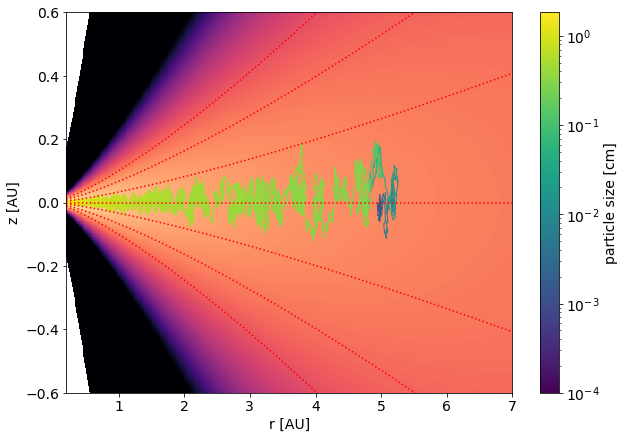

In [8]:
font = {'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)


amin = np.min(rho_g)
amax = np.max(rho_g)


fig, axs = plt.subplots(1, 1,figsize=(10,7))
axs.pcolormesh(z_plot, r_plot, rho_g,norm=colors.LogNorm(vmin=1.0e-20, vmax=amax), cmap='magma')

#plot the disk scale heights
axs.plot(r_grid,0.*hg,color='r',linestyle=':')
axs.plot(r_grid,1.*hg,color='r',linestyle=':')
axs.plot(r_grid,2.*hg,color='r',linestyle=':')
axs.plot(r_grid,3.*hg,color='r',linestyle=':')
axs.plot(r_grid,-1.*hg,color='r',linestyle=':')
axs.plot(r_grid,-2.*hg,color='r',linestyle=':')
axs.plot(r_grid,-3.*hg,color='r',linestyle=':')

# Create a continuous norm to map from data points to colors
#norm = plt.Normalize(a.min(), a.max())
norm=colors.LogNorm(vmin=a.min(), vmax=a.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(a)
lc.set_linewidth(1.0)
line = axs.add_collection(lc)
cbar=fig.colorbar(line, ax=axs)
cbar.set_label('particle size [cm]')

plt.xlabel('r [AU]')
plt.ylabel('z [AU]')

axs.set_xlim(simulation.disk.r_min/c.AU,simulation.disk.r_max/c.AU)
axs.set_ylim(simulation.disk.z_min/c.AU,simulation.disk.z_max/c.AU)
plt.show()

detail plots

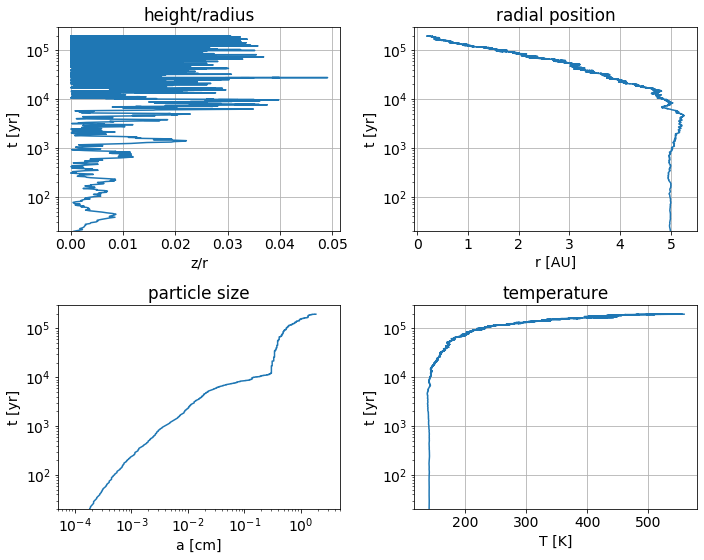

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(10,8))

ax[0][0].plot(np.abs(z/r),t)
ax[0][0].set_title('height/radius')
ax[0][0].set_ylabel('t [yr]')
ax[0][0].set_xlabel('z/r')
ax[0][0].set_yscale('log')
ax[0][0].set_ylim(2e1,3e5)
ax[0][0].grid()



ax[0][1].plot(r,t)
ax[0][1].set_title('radial position')
ax[0][1].set_ylabel('t [yr]')
ax[0][1].set_xlabel('r [AU]')
ax[0][1].set_ylim(2e1,3e5)
ax[0][1].set_yscale('log')
ax[0][1].grid()

ax[1][0].plot(a,t)
ax[1][0].set_title('particle size')
ax[1][0].set_ylabel('t [yr]')
ax[1][0].set_xlabel('a [cm]')
ax[1][0].set_xlim(5e-5,5e0)
ax[1][0].set_ylim(2e1,3e5)
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')

ax[1][1].plot(T,t)
ax[1][1].set_title('temperature')
ax[1][1].set_ylabel('t [yr]')
ax[1][1].set_xlabel('T [K]')
ax[1][1].set_yscale('log')
ax[1][1].set_ylim(2e1,3e5)
ax[1][1].grid()



plt.tight_layout()
plt.show()

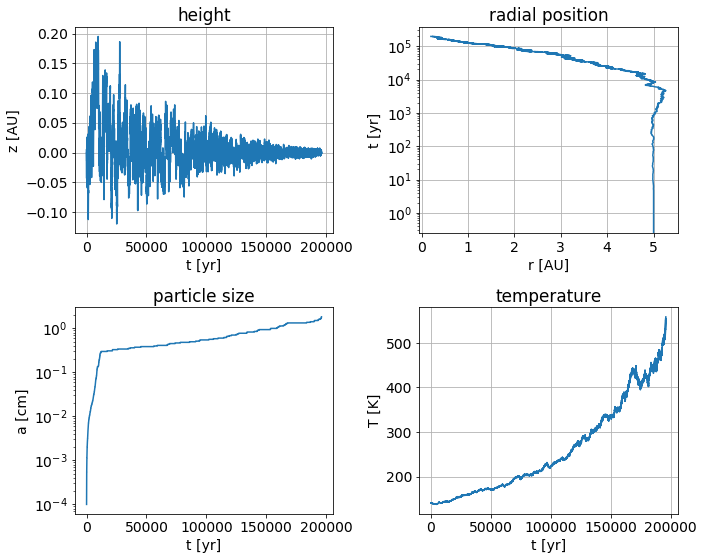

In [10]:
fig, ax = plt.subplots(2, 2,figsize=(10,8))

ax[0][0].plot(t,z)
ax[0][0].set_title('height')
ax[0][0].set_xlabel('t [yr]')
ax[0][0].set_ylabel('z [AU]')
ax[0][0].grid()



ax[0][1].plot(r,t)
ax[0][1].set_title('radial position')
ax[0][1].set_ylabel('t [yr]')
ax[0][1].set_xlabel('r [AU]')
#ax[0][1].set_ylim(1e3,2e5)
ax[0][1].set_yscale('log')
ax[0][1].grid()

ax[1][0].plot(t,a)
ax[1][0].set_title('particle size')
ax[1][0].set_xlabel('t [yr]')
ax[1][0].set_ylabel('a [cm]')
#ax[1][0].set_xlim(5e-5,5e0)
#ax[1][0].set_ylim(2e1,3e5)
#ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')

ax[1][1].plot(t,T)
ax[1][1].set_title('temperature')
ax[1][1].set_xlabel('t [yr]')
ax[1][1].set_ylabel('T [K]')
ax[1][1].grid()



plt.tight_layout()
plt.show()